In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Bank = pd.read_csv('Bank Customer Churn.csv')

## EDA

In [4]:
Bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
Bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### From the below result, we know that there are no null values in the dataset

In [7]:
Bank.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### We will be taking 'Exited' as the target variable

In [18]:
Bank['Exited'].unique()

array([1, 0], dtype=int64)

In [8]:
Bank.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [9]:
Bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
Bank_Cor = Bank.corr()

In [12]:
Bank_Cor.stack().mean()

0.08969462958336806

In [14]:
Bank.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
Bank_Cor.mean()

RowNumber          0.090236
CustomerId         0.091395
CreditScore        0.092568
Age                0.122347
Tenure             0.087151
Balance            0.073004
NumOfProducts      0.063111
HasCrCard          0.086488
IsActiveMember     0.083326
EstimatedSalary    0.093293
Exited             0.103723
dtype: float64

In [19]:
Bank_Cor

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:xlabel='Age', ylabel='Tenure'>

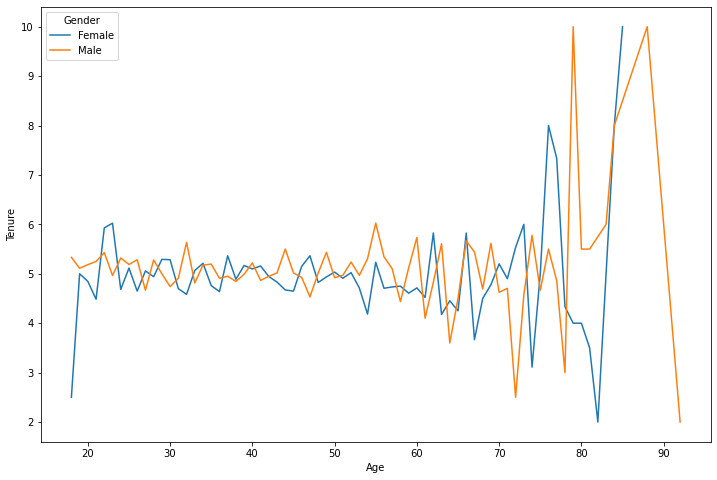

In [29]:
Figure = plt.figure(figsize=(12, 8))
sns.lineplot(x = 'Age', y = 'Tenure', hue = 'Gender', ci = None, data = Bank)

<AxesSubplot:xlabel='Tenure', ylabel='CreditScore'>

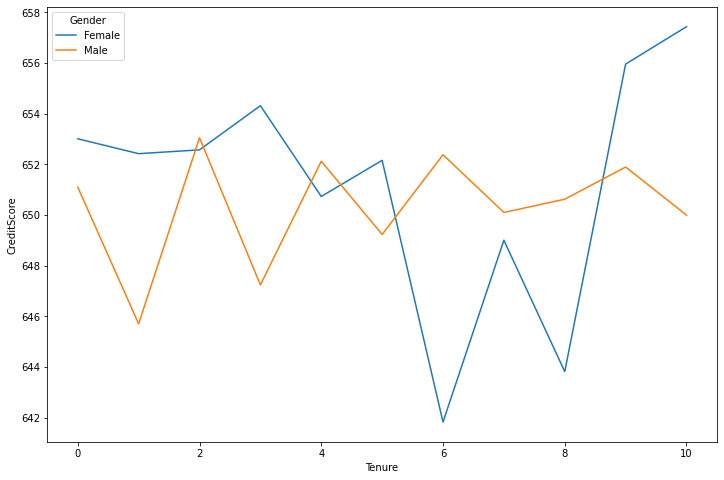

In [33]:
Figure = plt.figure(figsize=(12, 8))
sns.lineplot(x = 'Tenure', y = 'CreditScore', hue = 'Gender', ci = None, data = Bank)

<Figure size 864x576 with 0 Axes>

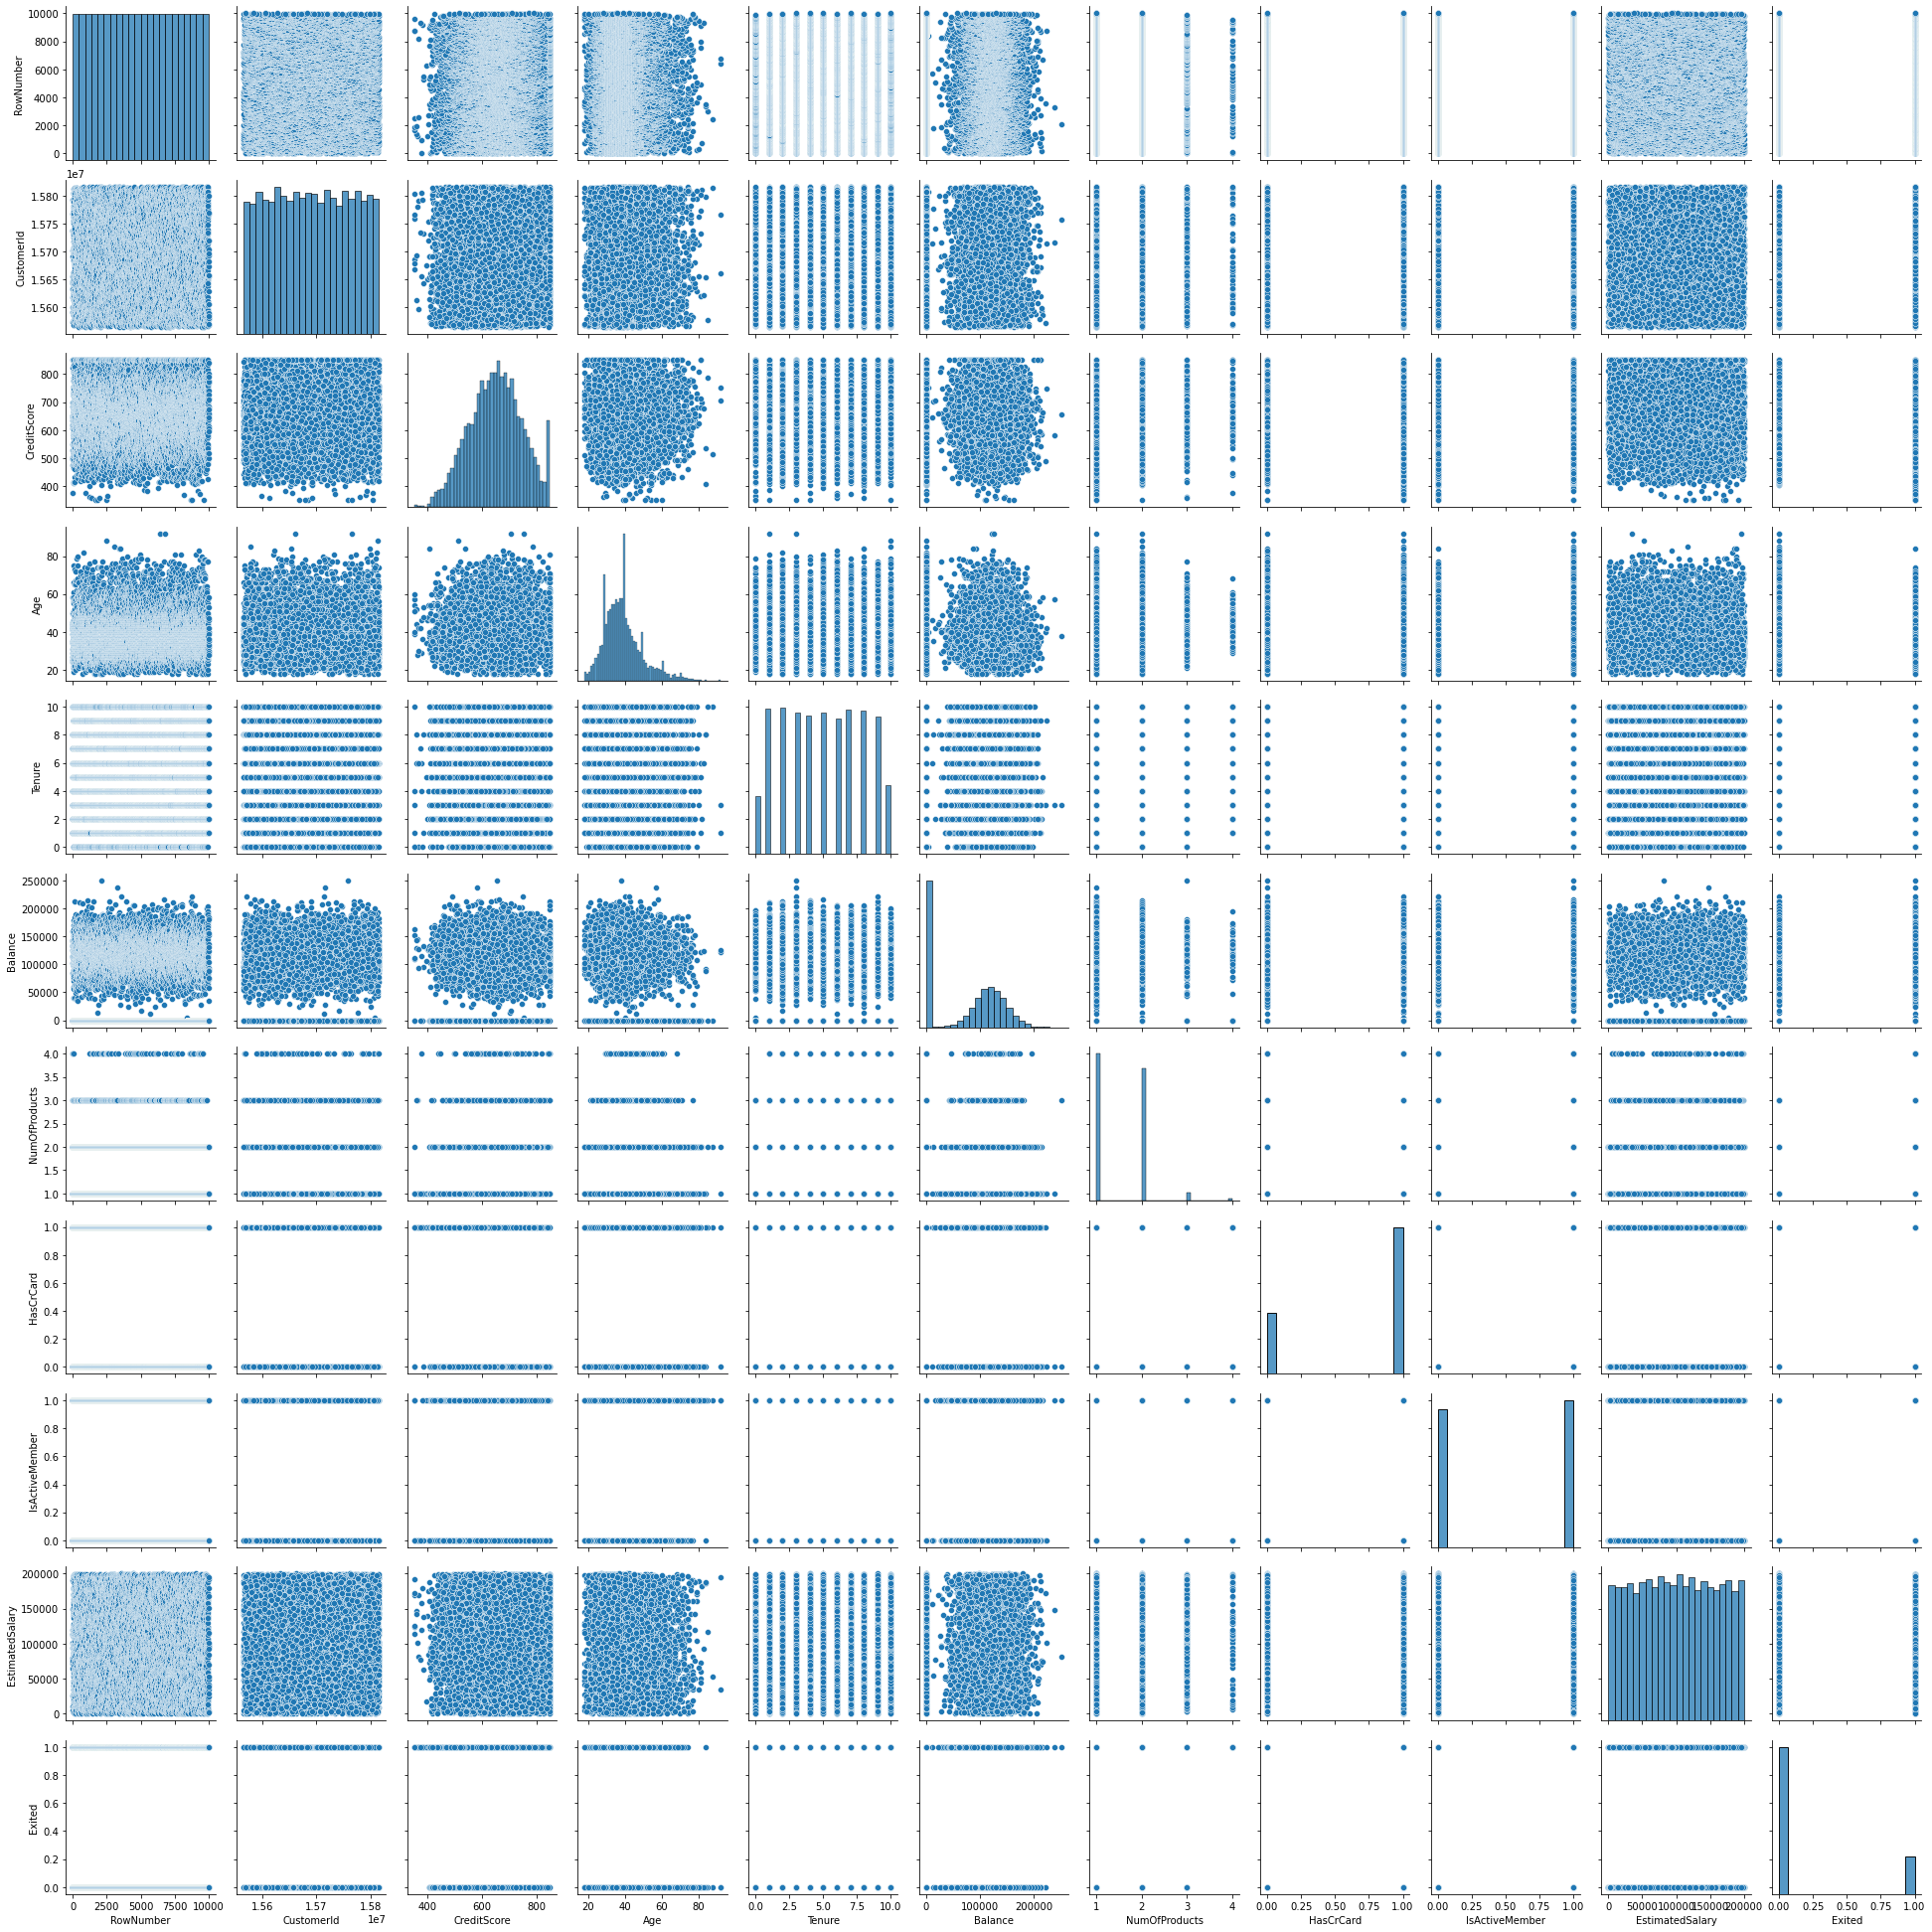

In [35]:
Figure = plt.figure(figsize=(12, 8))
sns.pairplot(Bank)

### Since RowNumber, CustomerID, Surname and HasCrCard have little to no impact on whether one will stay or leave their company, they will be dropped

### Geography will be dropped so that we may fit the data into the Decision Trees model

In [50]:
N_Bank = Bank.drop(['RowNumber', 'CustomerId', 'Surname', 'HasCrCard', 'Geography'], axis=1)

### In order to fit the data into the Decision Trees model, we will be encoding the Gender attribute

In [59]:
from sklearn import preprocessing

In [60]:
LE = preprocessing.LabelEncoder()

In [61]:
N_Bank['Gender']= LE.fit_transform(N_Bank['Gender'])

In [62]:
N_Bank['Gender'].unique()

array([0, 1])

### Now 'Female' has the value 0 and 'Male' has the value 1

In [64]:
N_Bank.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,101348.88,1
1,608,0,41,1,83807.86,1,1,112542.58,0
2,502,0,42,8,159660.80,3,0,113931.57,1
3,699,0,39,1,0.00,2,0,93826.63,0
4,850,0,43,2,125510.82,1,1,79084.10,0


<Figure size 864x576 with 0 Axes>

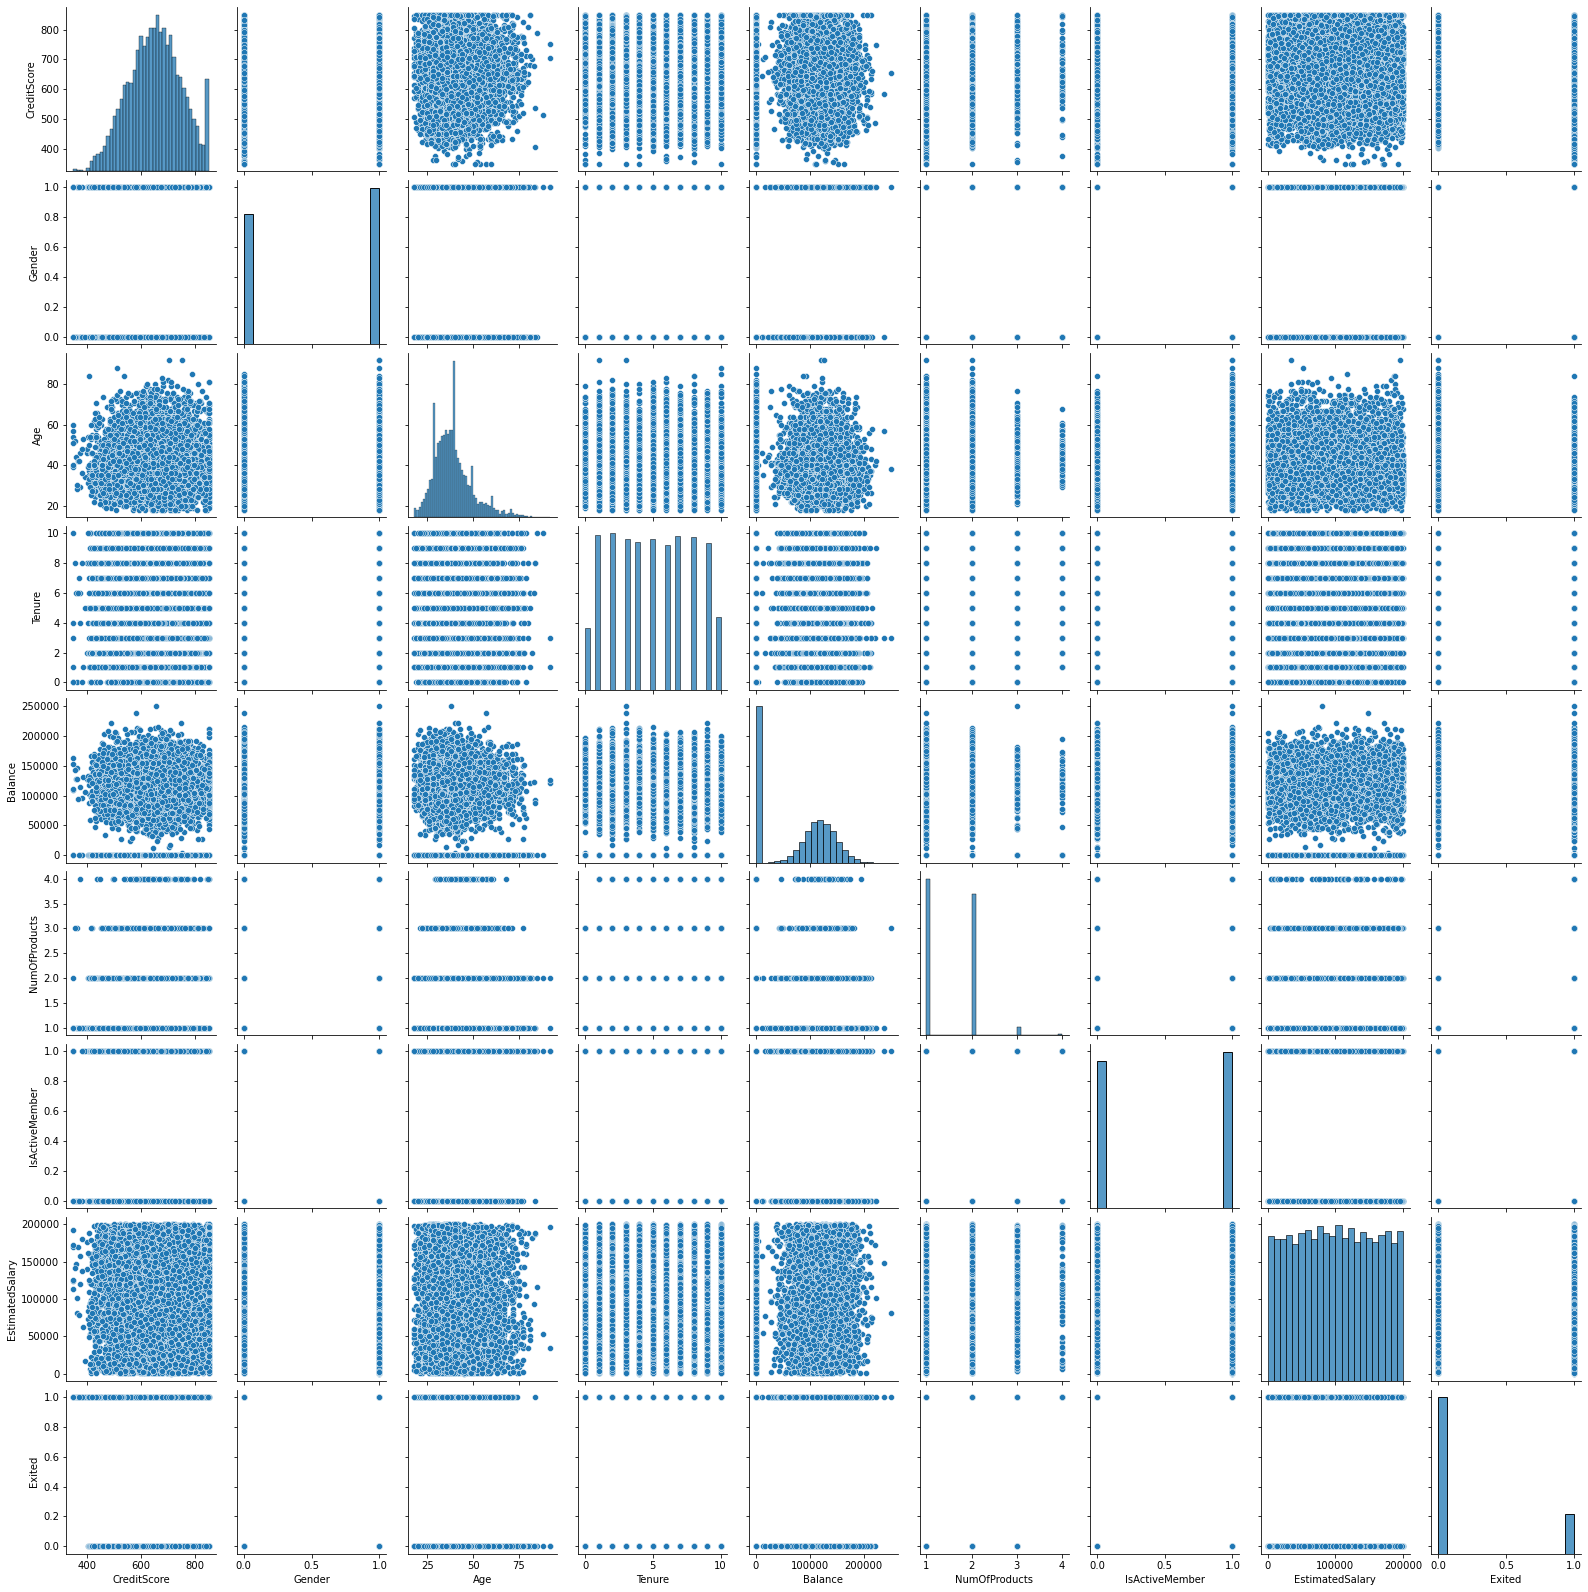

In [65]:
Figure = plt.figure(figsize=(12, 8))
sns.pairplot(N_Bank)

## Train-Test Split

In [66]:
from sklearn.model_selection import train_test_split

X = N_Bank.drop('Exited', axis=1)
Y = N_Bank['Exited']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 36)

In [67]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
0,619,0,42,2,0.00,1,1,101348.88
1,608,0,41,1,83807.86,1,1,112542.58
2,502,0,42,8,159660.80,3,0,113931.57
3,699,0,39,1,0.00,2,0,93826.63
4,850,0,43,2,125510.82,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,0,96270.64
9996,516,1,35,10,57369.61,1,1,101699.77
9997,709,0,36,7,0.00,1,1,42085.58
9998,772,1,42,3,75075.31,2,0,92888.52


In [68]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Decision Trees Implementation

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtree = DecisionTreeClassifier()

In [71]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [81]:
dt_predictions = dtree.predict(X_test)

### Evaluation of Decision Trees model

<AxesSubplot:xlabel='Exited'>

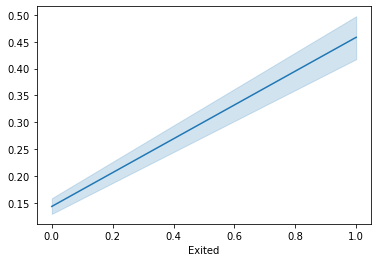

In [89]:
sns.lineplot(x = Y_test, y = dt_predictions)

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
print("\t\t\tEvaluation\n\nClassification Report\n")
print(classification_report(Y_test,dt_predictions))
print("\n\nConfusion Matrix\n")
print(confusion_matrix(Y_test,dt_predictions))

			Evaluation

Classification Report

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      2363
           1       0.46      0.46      0.46       637

    accuracy                           0.77      3000
   macro avg       0.66      0.66      0.66      3000
weighted avg       0.77      0.77      0.77      3000



Confusion Matrix

[[2025  338]
 [ 345  292]]


## Random Forests Implementation

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rfc = RandomForestClassifier()

In [87]:
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [88]:
rfc_predictions = rfc.predict(X_test)

### Evaluation of Random Forests Model

<AxesSubplot:xlabel='Exited'>

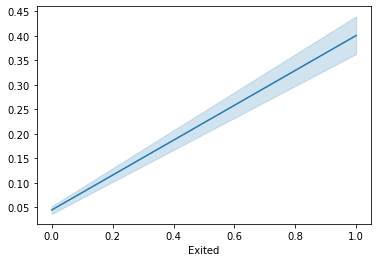

In [92]:
sns.lineplot(x = Y_test, y = rfc_predictions)

In [93]:
from sklearn.metrics import classification_report,confusion_matrix

print("\t\t\tEvaluation\n\nClassification Report\n")
print(classification_report(Y_test,rfc_predictions))
print("\n\nConfusion Matrix\n")
print(confusion_matrix(Y_test,rfc_predictions))

			Evaluation

Classification Report

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      2363
           1       0.71      0.40      0.51       637

    accuracy                           0.84      3000
   macro avg       0.78      0.68      0.71      3000
weighted avg       0.82      0.84      0.82      3000



Confusion Matrix

[[2257  106]
 [ 382  255]]
